## EDA for hobby

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data dir

data_dir = 'D:/thon/project/tourism/02.국민여가활동조사/3.데이터'

# data load

h21 = pd.read_csv(data_dir + '/hobby_21.csv')
h21 = pd.DataFrame(h21)

C:\Users\sujin\AppData\Local\Temp\ipykernel_10788\1857114713.py:7: DtypeWarning: Columns (90,100,101,102,103,104,105,126) have mixed types. Specify dtype option on import or set low_memory=False.
  h21 = pd.read_csv(data_dir + '/hobby_21.csv')


In [8]:
# 10049 rows with 356 columns

h21.shape

(10049, 356)

In [3]:
# 의미있는 칼럼 리스트 생성
sports_col = ['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4', 'q1_D']

for i in range(17):
    sports_col.append('q1_D_m' + str(i+2))

sports_col.extend(['q6', 'q9', 'q11_1_C', 'q11_2_C', 'q11_1_D', 'q11_3_D', 'q12_1_C', 'q12_2_C', 'q12_1_D', 'q12_3_D'])

sports_col.extend(['q45', 'q45_1', 'q45_2', 'q47'])

for i in range(12):
    sports_col.append('DM' + str(i+1))

print(len(sports_col))

48


In [4]:
# 스포츠경험자 df 생성 (sports_exp_df)

sports_exp = h21.loc[(h21['q1_C'] != '99') | (h21['q1_D'] != '99')]
sports_exp_df = sports_exp[sports_col] # 55개 칼럼 뽑음

# 스포츠비경험자 df 생성 (nonsports_df)
nonsports = h21.loc[(h21['q1_C'] == '99') & (h21['q1_D'] == '99')]
nonsports_df = nonsports[sports_col]

# 공백으로 차있는 값 대신 결측치 부여
sports_exp_df = sports_exp_df.convert_dtypes()
sports_exp_df = sports_exp_df.replace(" ", np.NaN) # 공백을 NA로 대체

nonsports_df = nonsports_df.convert_dtypes()
nonsports_df = nonsports_df.replace(" ", np.NaN) # 공백을 NA로 대체

print(sports_exp_df.head())
print('\n')
print(sports_exp_df.shape, nonsports_df.shape)

   q1_C q1_C_m2 q1_C_m3 q1_C_m4  q1_D q1_D_m2 q1_D_m3 q1_D_m4 q1_D_m5 q1_D_m6  \
4  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
5  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
6  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
8    99    <NA>    <NA>    <NA>  <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
9  <NA>      17    <NA>    <NA>  <NA>    <NA>      22    <NA>    <NA>    <NA>   

   ... DM3 DM4 DM5 DM6 DM7 DM8 DM9 DM10 DM11 DM12  
4  ...   3   2   1   1   5   2   3    5   15    3  
5  ...   1   2   3   1   5   2   3    5   15    3  
6  ...   2   3   2   1   5   3   3    5   15    3  
8  ...   1   1   3   1   8   1   3    5   15    3  
9  ...   3   2   2   2   6   3   3    5   15    3  

[5 rows x 48 columns]


(6826, 48) (3223, 48)


In [5]:
# 스포츠경험자 여부 칼럼 생성
h21['sports_exp'] = np.NaN

h21.loc[(h21['q1_C'] != '99') | (h21['q1_D'] != '99'), 'sports_exp'] = '1'
h21.loc[(h21['q1_C'] == '99') & (h21['q1_D'] == '99'), 'sports_exp'] = '0'

print(h21['sports_exp'].value_counts())


1    6826
0    3223
Name: sports_exp, dtype: int64


In [6]:
# 스포츠관람활동 (직접관람 , 간접관람, 격투관람, 온라인게임 관람)
sports_watch_col = ['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4']
sports_watch = sports_exp_df.shape[0] - sports_exp_df[sports_watch_col].isnull().sum()

# 경기 관람을 1회 이상 한 사람
sports_watch.index = ["경기관람", "간접관람", "격투관람", "이스포츠"]
sports_watch

경기관람    2396
간접관람    4742
격투관람     307
이스포츠     374
dtype: int64

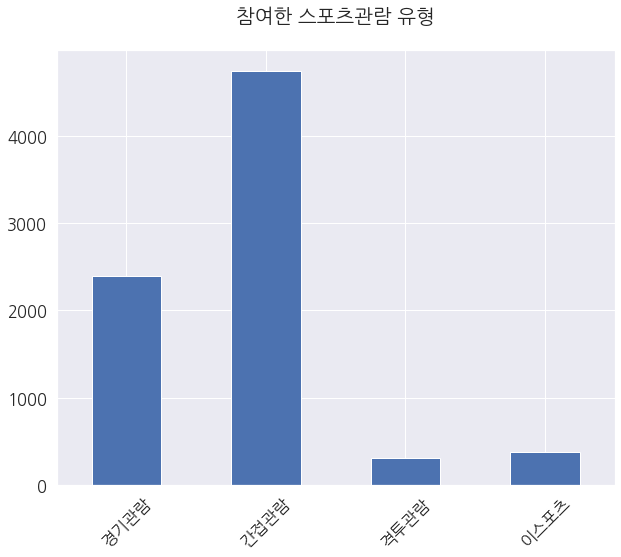

In [18]:
# 스포츠참여활동 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 8))
ax = sports_watch.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('참여한 스포츠관람 유형\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

### 간접관람의 빈도수가 가장 높았고, 직접관람의 빈도수도 2396명으로 적지 않았다.

In [7]:
# 스포츠참여활동 (18가지 카테고리)
sports_active_col = ['q1_D', 'q1_D_m2', 'q1_D_m3', 'q1_D_m4', 'q1_D_m5', 'q1_D_m6', 'q1_D_m7', 'q1_D_m8', 'q1_D_m9', 'q1_D_m10', 'q1_D_m11', 'q1_D_m12', 'q1_D_m13', 'q1_D_m14', 'q1_D_m15', 'q1_D_m16', 'q1_D_m17', 'q1_D_m18']
sports_active = sports_exp_df.shape[0] - sports_exp_df[sports_active_col].isnull().sum()

# 스포츠여가활동에 1회 이상 참여한 사람
sports_active.index = ["농구/배구/야구/축구/족구", "테니스/스쿼시", "당구/포켓볼", "볼링/탁구", "골프", "수영", "수상스포츠", "스노보드/스키", "아이스스케이트/아이스하키", "헬스/에어로빅", "요가/필라테스/태보", "배드민턴/줄넘기/스트레칭/훌라후프", "육상/조깅/속보", "격투스포츠", "댄스스포츠",
"사이클링/산악자전거", "인라인스케이트", "승마/암벽등반/철인삼종경기/서바이벌"]
sports_active

농구/배구/야구/축구/족구         2704
테니스/스쿼시                  98
당구/포켓볼                  688
볼링/탁구                   742
골프                      538
수영                      364
수상스포츠                    73
스노보드/스키                 108
아이스스케이트/아이스하키            28
헬스/에어로빅                1303
요가/필라테스/태보              633
배드민턴/줄넘기/스트레칭/훌라후프     1865
육상/조깅/속보                625
격투스포츠                   126
댄스스포츠                    75
사이클링/산악자전거              382
인라인스케이트                  43
승마/암벽등반/철인삼종경기/서바이벌      39
dtype: int64

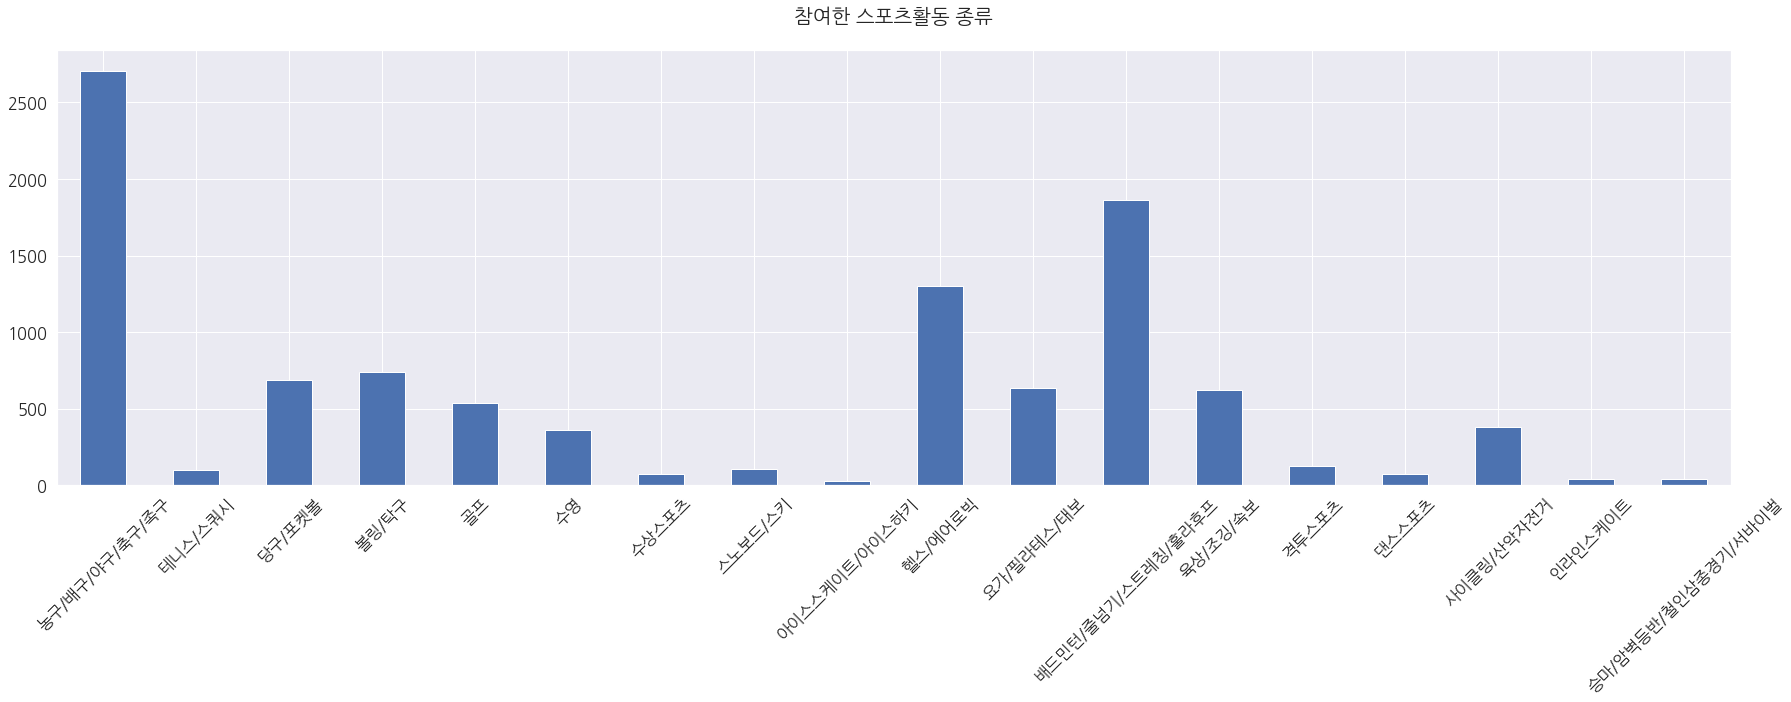

In [20]:
# 스포츠참여활동 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(30, 8))
ax = sports_active.plot(kind = 'bar')
plt.xticks(rotation=45)
ax.set_title('참여한 스포츠활동 종류\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

### 한 번 이상 참여한 여가활동 순위
### 1위 농구/배구/야구/축구/족구 2위 배드민턴/줄넘기/스트레칭/훌라후프 3위 헬스/에어로빅

## 스포츠관람 경험자 분석

In [8]:
# 관람만 한 사람, 참여만 한 사람 추출
watch_null = sports_exp_df['q1_C'].isin(['99']) # 관람 경험 NULL인 사람 -> 스포츠활동만 경험한 사람 (1808명)
active_null = sports_exp_df['q1_D'].isin(['99']) # 활동 경험 NULL인 사람 -> 스포츠관람만 경험한 사람 (1765명)

only_watch = sports_exp_df[~watch_null] # 관람 경험 NULL인 사람을 제외한 행 -> 관람을 한번이라도 한 사람
only_active = sports_exp_df[~active_null] # 활동 경험 NULL인 사람을 제외한 행 -> 활동을 한번이라도 한 사람

print('관람을 한번이라도 경험한 사람 수:', only_watch.shape[0])
print('활동을 한번이라도 경험한 사람 수:', only_active.shape[0])

관람을 한번이라도 경험한 사람 수: 5018
활동을 한번이라도 경험한 사람 수: 5061


('직접관람',) 성별 비중


('간접관람',) 성별 비중


('격투관람',) 성별 비중


('이스포츠',) 성별 비중




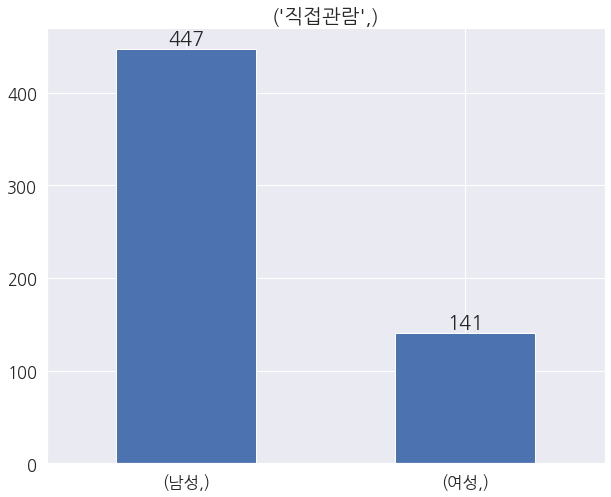

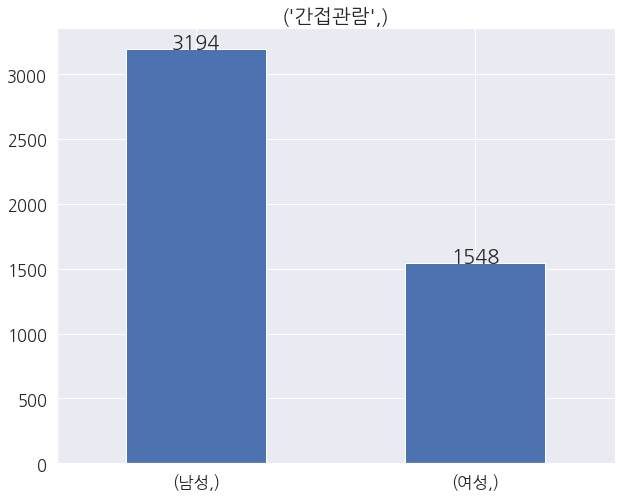

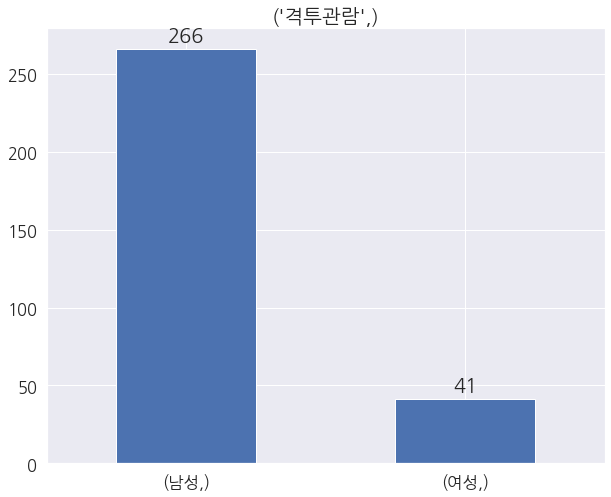

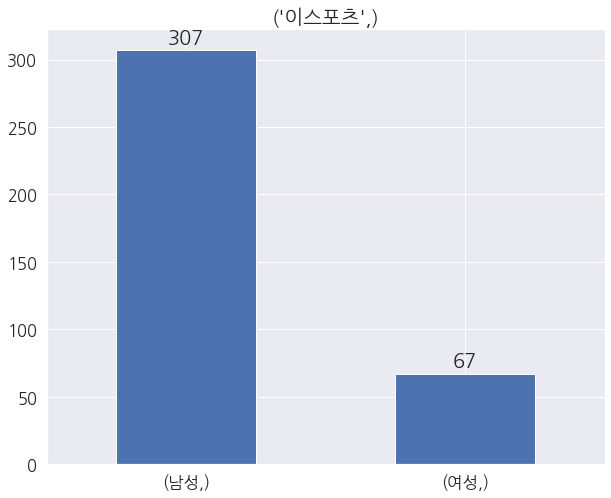

In [22]:
for i, col in enumerate(sports_watch_col):
    
    sports_watch.index = [['직접관람', '간접관람', '격투관람', '이스포츠']]
    print(sports_watch.index[i],'성별 비중')
    title = sports_watch.index[i]
    watch_gender = only_watch[[col, 'DM1']].value_counts(sort = False)
    watch_gender.index = [['남성', '여성']]

    sns.set(font_scale = 1.5)
    plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
    plt.figure(figsize = (10, 8))
    ax = watch_gender.plot(kind = 'bar')
    plt.xticks(rotation = 0)
    ax.set_title(title, fontsize = 20)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 20)

    ax.set_xlabel('');  # semicolon suppresses text output
    
    print('\n')

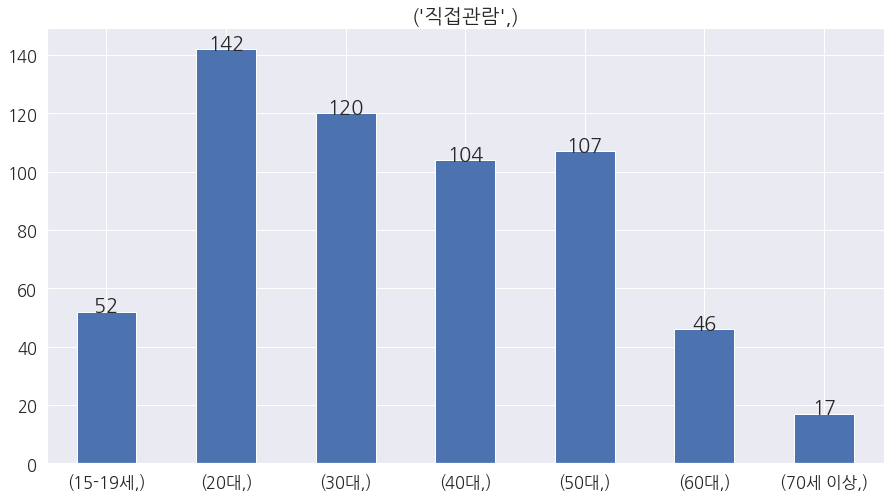

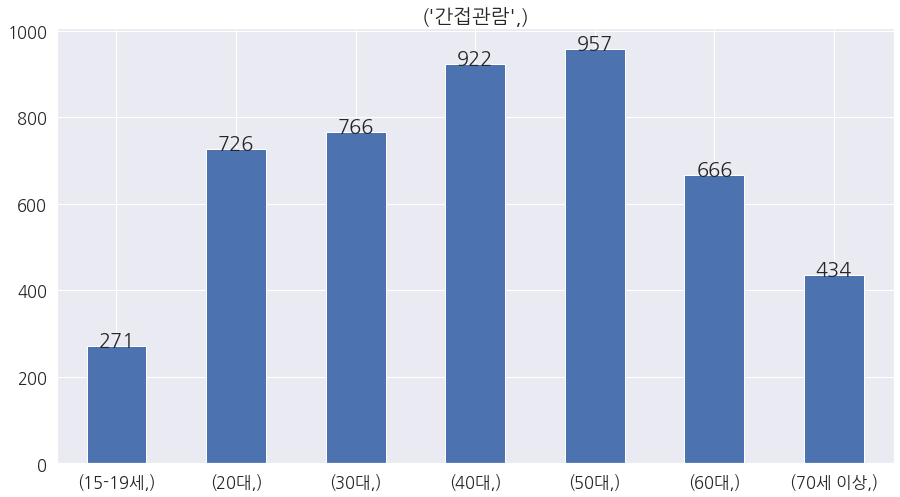

In [23]:
for i, col in enumerate(sports_watch_col[0:2]):

    title = sports_watch.index[i]
    watch_age = only_watch[[col, 'DM2']].value_counts(sort = False)
    watch_age.index = [['15-19세', '20대', '30대', '40대', '50대', '60대', '70세 이상']]

    sns.set(font_scale = 1.5)
    plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
    plt.figure(figsize = (15, 8))
    ax = watch_age.plot(kind = 'bar')
    plt.xticks(rotation = 0)
    ax.set_title(title, fontsize = 20)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 20)

    ax.set_xlabel('');  # semicolon suppresses text output
    
    print('\n')

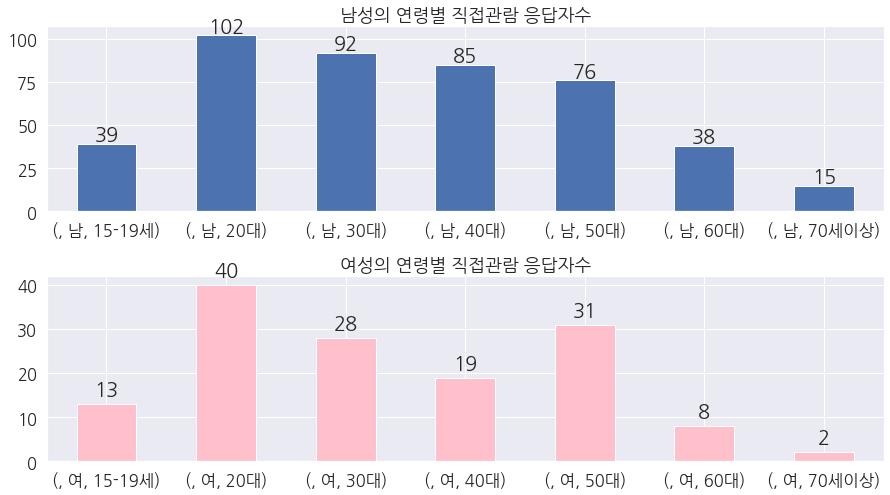

In [24]:
watch_gender_age = only_watch[['q1_C', 'DM1', 'DM2']].value_counts(sort = False)
watch_gender_age.index = [('', '남', '15-19세'), ('', '남', '20대'), ('', '남', '30대'), ('', '남', '40대'), ('', '남', '50대'), ('', '남', '60대'), ('', '남', '70세이상'), 
('', '여', '15-19세'), ('', '여', '20대'), ('', '여', '30대'), ('', '여', '40대'), ('', '여', '50대'), ('', '여', '60대'), ('', '여', '70세이상')]

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(2, 1, 1)
watch_gender_age[0:7].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('남성의 연령별 직접관람 응답자수')

for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax1.set_xlabel('');  # semicolon suppresses text output

ax2 = fig.add_subplot(2, 1, 2)
watch_gender_age[7:].plot(kind = 'bar', color = 'pink')
plt.xticks(rotation = 0)
plt.title('여성의 연령별 직접관람 응답자수')

for p in ax2.patches:
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax2.set_xlabel('');  # semicolon suppresses text output


plt.subplots_adjust(hspace = 0.35)

### 남성 20대, 30대 비중이 가장 크고, 40대 50대가 그 다음으로 높음
### 여성의 경우 20대 비중이 가장 크며, 그 다음으로 50대가 높음 -> 중년부부의 동반관람이 조금 있는듯

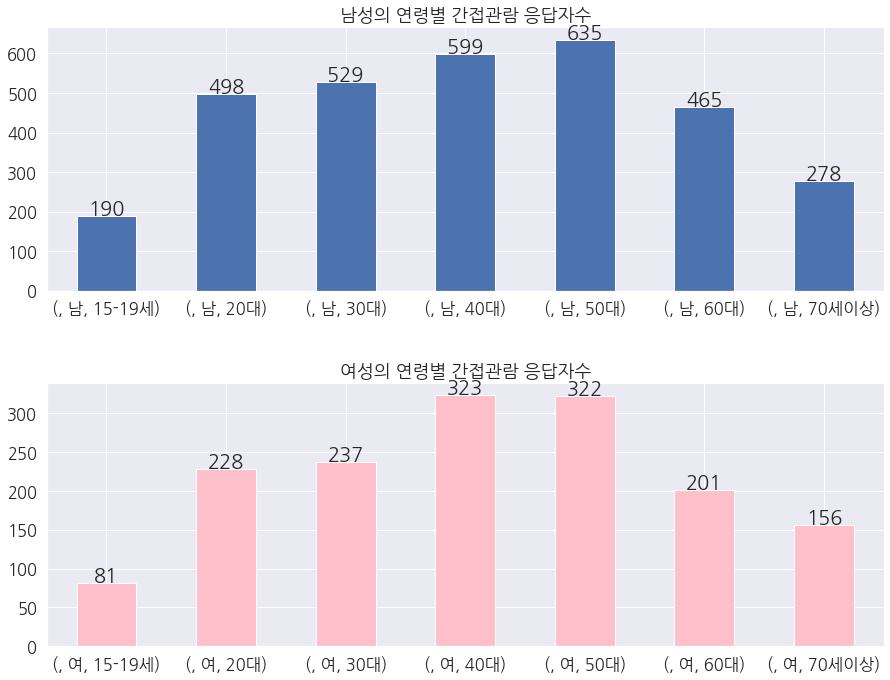

In [25]:
watch_gender_age2 = only_watch[['q1_C_m2', 'DM1', 'DM2']].value_counts(sort = False)
watch_gender_age2.index = [('', '남', '15-19세'), ('', '남', '20대'), ('', '남', '30대'), ('', '남', '40대'), ('', '남', '50대'), ('', '남', '60대'), ('', '남', '70세이상'), 
('', '여', '15-19세'), ('', '여', '20대'), ('', '여', '30대'), ('', '여', '40대'), ('', '여', '50대'), ('', '여', '60대'), ('', '여', '70세이상')]

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(2, 1, 1)
watch_gender_age2[0:7].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('남성의 연령별 간접관람 응답자수')

for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax1.set_xlabel('');  # semicolon suppresses text output

ax2 = fig.add_subplot(2, 1, 2)
watch_gender_age2[7:].plot(kind = 'bar', color = 'pink')
plt.xticks(rotation = 0)
plt.title('여성의 연령별 간접관람 응답자수')

for p in ax2.patches:
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax2.set_xlabel('');  # semicolon suppresses text output


plt.subplots_adjust(top = 1.2, hspace = 0.35)

### 남성 40-50대의 비중이 20-30대보다 큼
### 여성 40-50대의 비중이 20-30대보다 큼
### 간접관람을 선호하는 40-50대, 그 이유는 무엇일까? + 그 이유를 보완한다면, 간접관람을 직접관람 수요로 돌릴 수 있지 않을까?

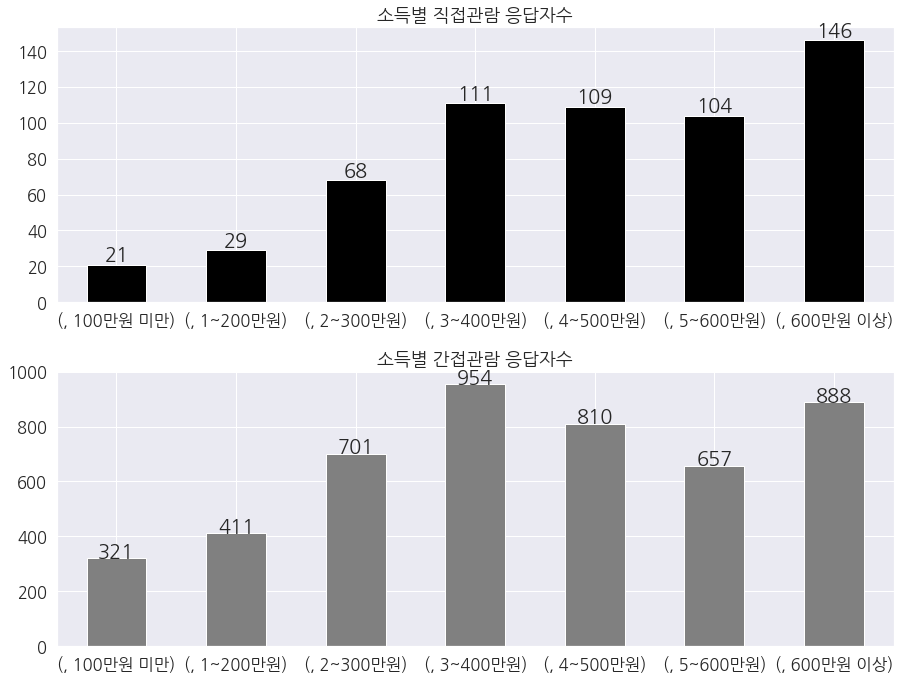

In [26]:
watch_inc = only_watch[['q1_C', 'DM8']].value_counts(sort = False)
watch_inc.index = [('', '100만원 미만'), ('', '1~200만원'), ('', '2~300만원'), ('', '3~400만원'), ('', '4~500만원'), ('', '5~600만원', ), ('', '600만원 이상')]

watch_inc2 = only_watch[['q1_C_m2', 'DM8']].value_counts(sort = False)
watch_inc2.index = [('', '100만원 미만'), ('', '1~200만원'), ('', '2~300만원'), ('', '3~400만원'), ('', '4~500만원'), ('', '5~600만원', ), ('', '600만원 이상')]

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(2, 1, 1)
watch_inc.plot(kind = 'bar', color = 'black')
plt.xticks(rotation = 0)
plt.title('소득별 직접관람 응답자수')

for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax1.set_xlabel('');  # semicolon suppresses text output
plt.subplots_adjust(top = 1.2, hspace = 0.35)

ax2 = fig.add_subplot(2, 1, 2)
watch_inc2.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation = 0)
plt.title('소득별 간접관람 응답자수')

for p in ax2.patches:
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 20)

ax2.set_xlabel('');  # semicolon suppresses text output
plt.subplots_adjust(hspace = 0.25)

### 소득격차가 직접관람에 영향을 크게 미침을 확인
### 월 300만원 이상 소득인 가구부터 직접 관람을 많이 하며, 월 600만원 이상의 고소득 가구는 더 여유롭게 직관을 자주하는 것으로 보임
###

## 하지만 위의 지표가 지난 1년간 참여/관람한 횟수이므로 지속적인 여가를 즐겼다는 지표로 보기는 어려움
### 따라서, 스포츠 관련 여가활동의 지속 여부를 확인할 필요가 있음
##

### '스포츠인'이라는 용어 새롭게 정의
### 스포츠인: 지난 1년간 지속적으로 스포츠관람 혹은 스포츠활동에 직접 참여한 사람이라고 응답한 자
##

In [9]:
# 변수명 Q6: 스포츠인 여부 (라벨 16~37까지가 스포츠 관련 라벨)
q6_na = sports_exp_df['q6'].isin(["99"])
sportsman = sports_exp_df[~q6_na]

경기관람을 꾸준히 지속하는 사람 빈도


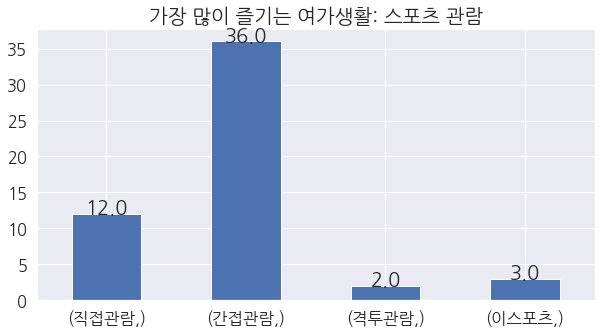

In [10]:
# 스포츠인 중 스포츠관람러
sportsman_count = sportsman['q6'].value_counts(dropna = True)
print('경기관람을 꾸준히 지속하는 사람 빈도')
watch_first = sportsman_count.loc[['16', '17', '18', '19']]
watch_first.index = [['직접관람', '간접관람', '격투관람', '이스포츠']]

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 5))
ax = watch_first.plot(kind = 'bar')
plt.xticks(rotation = 0)
ax.set_title('가장 많이 즐기는 여가생활: 스포츠 관람', fontsize = 20)
    
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 20)

ax.set_xlabel('');  # semicolon suppresses text output

### 스포츠관람이 주된 취미인 사람은 매우 적었음
### 함께 즐길 수 있는 다른 취미가 많기 때문인 것으로 생각
##

In [29]:
print('스포츠를 취미로 꾸준히 하는 사람')
sportsman_act_count = sportsman_count.loc[['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']]
sportsman_act_count.index =  ["농구/배구/야구/축구/족구", "테니스/스쿼시", "당구/포켓볼", "볼링/탁구", "골프", "수영", "수상스포츠", "스노보드/스키", "아이스스케이트/아이스하키", "헬스/에어로빅", "요가/필라테스/태보", "배드민턴/줄넘기/스트레칭/훌라후프", "육상/조깅/속보", "격투스포츠", "댄스스포츠",
"사이클링/산악자전거", "인라인스케이트", "승마/암벽등반/철인삼종경기/서바이벌"]
print(sportsman_act_count)
print('\n')
print('꾸준히 스포츠에 참여하며 여가활동을 즐기는 사람 수: ', sportsman_act_count.sum())

스포츠를 취미로 꾸준히 하는 사람
농구/배구/야구/축구/족구         187
테니스/스쿼시                 23
당구/포켓볼                  30
볼링/탁구                   66
골프                     172
수영                      75
수상스포츠                   12
스노보드/스키                  3
아이스스케이트/아이스하키            1
헬스/에어로빅                409
요가/필라테스/태보             195
배드민턴/줄넘기/스트레칭/훌라후프     129
육상/조깅/속보                58
격투스포츠                   33
댄스스포츠                   16
사이클링/산악자전거             112
인라인스케이트                  2
승마/암벽등반/철인삼종경기/서바이벌      5
Name: q6, dtype: Int64


꾸준히 스포츠에 참여하며 여가활동을 즐기는 사람 수:  1528


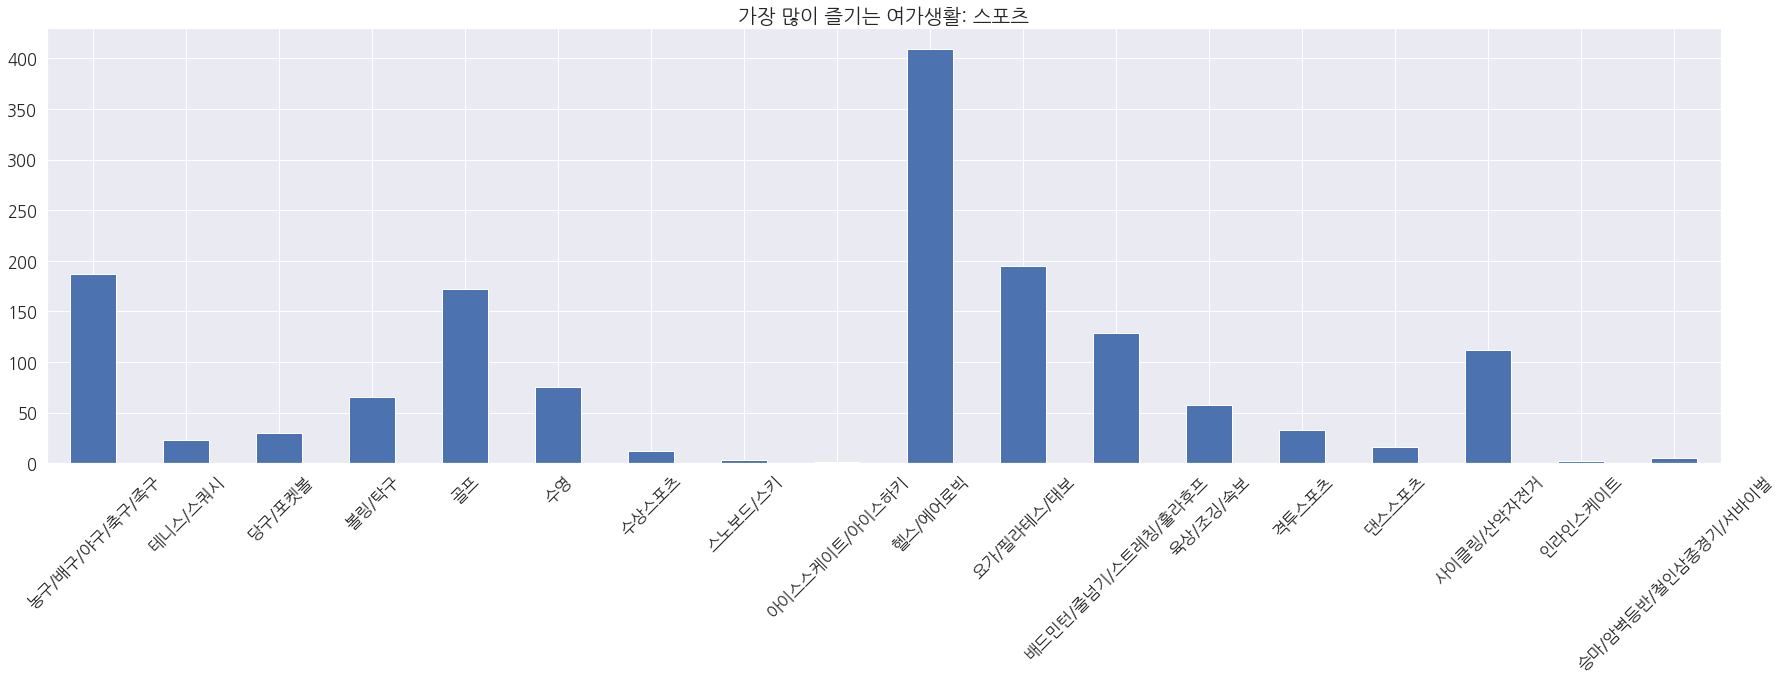

In [ ]:
# 꾸준한 스포츠활동참여 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (30, 8))
ax = sportsman_act_count.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('가장 많이 즐기는 여가생활: 스포츠', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

### 꾸준한 여가생활로 선호하는 스포츠활동 순위
### 1위 헬스/에어로빅 2위 요가/필라테스/태보 3위 농구/배구/야구/축구/족구

## 스포츠 관람, 스포츠 활동을 꾸준히 하는 사람들의 월 평균 지출

In [11]:
# 꾸준한 직관러들의 소비금액 요약
sportsman.loc[sportsman['q6'] == '16', 'q9'].describe().round()

count        12.0
mean     172500.0
std      123518.0
min       50000.0
25%       65000.0
50%      125000.0
75%      300000.0
max      400000.0
Name: q9, dtype: float64

In [31]:
# 꾸준한 간접관람객들의 소비금액 요약
sportsman.loc[sportsman['q6'] == '17', 'q9'].describe().round()

count        36.0
mean     121694.0
std       88024.0
min        3000.0
25%       50000.0
50%      100000.0
75%      162500.0
max      350000.0
Name: q9, dtype: float64

In [32]:
# 스포츠 활동러들 행 추출

sportsman_act_index = sportsman['q6'].isin(['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37'])
sportsman_act = sportsman[sportsman_act_index]

In [33]:
## 고비용 스포츠

print('골프')
print(sportsman_act.loc[sportsman_act['q6'] == '24', 'q9'].describe().round())
print('\n')

print('윈드서핑, 수상스키, 스킨스쿠버, 래프팅, 요트')
print(sportsman_act.loc[sportsman_act['q6'] == '26', 'q9'].describe().round())

print('\n')
print('승마, 암벽등반, 철인삼종경기, 서바이벌')
print(sportsman_act.loc[sportsman_act['q6'] == '37', 'q9'].describe().round())

골프
count        172.0
mean      487442.0
std       456797.0
min        20000.0
25%       200000.0
50%       325000.0
75%       500000.0
max      3000000.0
Name: q9, dtype: float64


윈드서핑, 수상스키, 스킨스쿠버, 래프팅, 요트
count         12.0
mean      400000.0
std       329600.0
min        50000.0
25%       200000.0
50%       300000.0
75%       600000.0
max      1000000.0
Name: q9, dtype: float64


승마, 암벽등반, 철인삼종경기, 서바이벌
count          5.0
mean      400000.0
std       344601.0
min       150000.0
25%       200000.0
50%       300000.0
75%       350000.0
max      1000000.0
Name: q9, dtype: float64


In [34]:
# 선호도가 높은 스포츠

print('축구/배구/농구/야구/족구')
print(sportsman_act.loc[sportsman_act['q6'] == '20', 'q9'].describe().round())

print('\n')
print('헬스/에어로빅')
print(sportsman_act.loc[sportsman_act['q6'] == '29', 'q9'].describe().round())

print('\n')
print('요가/필라테스')
print(sportsman_act.loc[sportsman_act['q6'] == '30', 'q9'].describe().round())

축구/배구/농구/야구/족구
count        187.0
mean      187807.0
std       190297.0
min            0.0
25%        50000.0
50%       100000.0
75%       275000.0
max      1000000.0
Name: q9, dtype: float64


헬스/에어로빅
count        409.0
mean      218456.0
std       186431.0
min            0.0
25%       100000.0
50%       200000.0
75%       300000.0
max      2000000.0
Name: q9, dtype: float64


요가/필라테스
count        195.0
mean      214641.0
std       174651.0
min            0.0
25%       100000.0
50%       200000.0
75%       275000.0
max      1000000.0
Name: q9, dtype: float64


## 평일, 휴일 참여 희망 스포츠

### '스포츠경험자'와 '스포츠비경험자'라는 새로운 용어 정의
### 스포츠경험자: 1년 내에 1회 이상 스포츠관람/참여활동을 한 경험이 있는 사람
### 스포츠비경험자: 1년 내에 스포츠관람/참여활동을 한번도 경험한 적 없는 사람

In [35]:
# 데이터 수
num_whole = h21.shape[0] # 전체 응답자 수
num_sport = sports_exp_df.shape[0] # 스포츠경험자 수
num_nonsport = num_whole - num_sport # 스포츠비경험자 수

print('스포츠경험자수:', num_sport)
print('스포츠비경험자수:', num_nonsport)

스포츠경험자수: 6826
스포츠비경험자수: 3223


In [37]:
# 평일 희망 관람 활동
print(h21['q11_1_C'].value_counts()) # 전체 응답자 중 평일에 스포츠 관람을 희망한고 응답한 사람
print('\n')
print(sports_exp_df['q11_1_C'].value_counts() / num_sport * 100) # 스포츠경험자 중 평일에 스포츠 관람을 희망한고 응답한 사람
print('\n')
print((h21['q11_1_C'].value_counts() - sports_exp_df['q11_1_C'].value_counts()) / num_nonsport * 100)

# 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
# 스포츠비경험자는 스포츠 관람 희망 비율이 0.2%, 비희망 비율이 99.8%

98    5651
17    4140
19     139
16      92
18      27
Name: q11_1_C, dtype: int64


17    60.577205
98    35.657779
19     2.036332
16     1.333138
18     0.395546
Name: q11_1_C, dtype: Float64


16     0.031027
17     0.155135
18          0.0
19          0.0
98    99.813838
Name: q11_1_C, dtype: Float64


### 스포츠경험자는 평일 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
### 스포츠비경험자는 평일 스포츠 관람 희망 비율이 0.2%, 비희망 비율이 99.8%

In [38]:
# 휴일 희망 관람 활동
print(h21['q12_1_C'].value_counts()) # for 전체 응답자
print('\n')
print(sports_exp_df['q12_1_C'].value_counts() / num_sport * 100) # 스포츠경험자의 비율
print('\n')
print((h21['q12_1_C'].value_counts() - sports_exp_df['q12_1_C'].value_counts()) / num_nonsport * 100) # 스포츠비경험자의 비율

# 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
# 스포츠비경험자는 스포츠 관람 희망 비율이 0.3%, 비희망 비율이 99.7%

98    5640
17    3923
16     255
19     174
18      57
Name: q12_1_C, dtype: int64


17    57.354234
98     35.54058
16     3.721067
19     2.549077
18     0.835042
Name: q12_1_C, dtype: Float64


16     0.031027
17     0.248216
18          0.0
19          0.0
98    99.720757
Name: q12_1_C, dtype: Float64


### 스포츠경험자는 스포츠 관람 희망 비율이 64%, 비희망 비율이 36%
### 스포츠비경험자는 스포츠 관람 희망 비율이 0.3%, 비희망 비율이 99.7%
###

## 결론 1. 스포츠경험자와 스포츠비경험자 간 스포츠 관람 의사가 매우 크게 차이남
###

## 평일/휴일 직접 참여 희망 스포츠

In [39]:
# 평일 참여 희망 스포츠

print(h21['q11_3_D'].value_counts()) # 전체 응답자
print('\n')
print(round((sports_exp_df['q11_3_D'].value_counts() / num_sport * 100), 2)) # 스포츠경험자
print('\n')
print(round(((h21['q11_3_D'].value_counts() - sports_exp_df['q11_3_D'].value_counts()) / num_nonsport * 100), 2).sort_values(ascending = False))

# 스포츠경험자 중 22%는 스포츠활동을 희망하지 않음, 14%는 헬스, 13%는 배드민턴/스트레칭/줄넘기 10%는 요가/필라테스, 7%는 축/배/야/농/족구, 6%는 골프, 5% 볼링/탁구 & 수영
# 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31, 요가/필라테스 30) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯

# 스포츠비경험자 중 66%는 스포츠활동을 희망하지 않음, 11%는 요가/필라테스, 7%는 수영, 5%는 헬스 순으로 희망
# 스포츠비경험자는 건강을 위한 스포츠 위주로 희망

98    3608
29    1118
30    1061
31     992
25     585
20     479
24     431
23     409
22     373
32     247
35     221
34     145
21      81
37      79
26      77
33      75
27      39
36      19
28      10
Name: q11_3_D, dtype: int64


98    21.92
29    13.92
31    13.23
30    10.24
20     6.56
24     5.89
23     5.32
25     5.26
22     5.02
32     3.27
35     2.92
34     1.52
33     1.04
21     1.03
26      1.0
37     0.98
27     0.51
36     0.25
28     0.13
Name: q11_3_D, dtype: Float64


98    65.53
30    11.23
25     7.01
29     5.21
31     2.76
23     1.43
34     1.27
20     0.96
22     0.93
24      0.9
32     0.74
35     0.68
37     0.37
21     0.34
26     0.28
27     0.12
33     0.12
36     0.06
28     0.03
Name: q11_3_D, dtype: Float64


#### 스포츠경험자 중 22%는 스포츠활동을 희망하지 않음, 14%는 헬스, 13%는 배드민턴/스트레칭/줄넘기 10%는 요가/필라테스, 7%는 축/배/야/농/족구, 6%는 골프, 5% 볼링/탁구 & 수영
#### 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31, 요가/필라테스 30) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯
####

#### 스포츠비경험자 중 66%는 스포츠활동을 희망하지 않음, 11%는 요가/필라테스, 7%는 수영, 5%는 헬스 순으로 희망
#### 스포츠비경험자는 건강을 위한 스포츠 위주로 희망
##

In [40]:
# 휴일 참여 희망 스포츠

print(h21['q12_3_D'].value_counts()) # 전체 응답자
print('\n')
print(round((sports_exp_df['q12_3_D'].value_counts() / num_sport * 100), 2)) # 스포츠경험자
print('\n')
print(round(((h21['q12_3_D'].value_counts() - sports_exp_df['q12_3_D'].value_counts()) / num_nonsport * 100), 2).sort_values(ascending = False))

# 스포츠경험자 중 24%는 스포츠활동을 희망하지 않음, 13%는 배드민턴/스트레칭/줄넘기, 8%는 헬스, 8% 골프, 8% 요가/필라테스, 7% 축배야농족구 6% 볼링/탁구 희망
# 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯

# 스포츠비경험자 중 67%는 스포츠활동을 희망하지 않음, 9%는 요가/필라테스, 6%는 수영, 4%는 헬스 3%는 배드민턴/줄넘기/스트레칭 순으로 희망
# 스포츠비경험자는 건강을 위한 스포츠(요가/필라테스 30, 수영, 25, 헬스 29, 스트레칭/줄넘기 31) 위주로 희망

# 휴일에는 스포츠경험자의 헬스의 선호도가 약 6% 가량 낮아진다는 점이 눈에 띔
# 골프와 사이클의 비중이 높아짐 

98    3798
31     970
30     835
29     679
24     608
25     522
20     519
23     463
35     395
22     371
32     265
34     152
26     111
37      88
27      86
21      84
33      55
36      34
28      14
Name: q12_3_D, dtype: int64


98    24.17
31    12.82
29     8.13
24     8.09
30     7.93
20     7.08
23     5.93
35     5.17
22     4.95
25     4.78
32     3.47
34     1.57
26     1.33
37     1.11
27     1.07
21     1.03
33     0.73
36     0.45
28     0.19
Name: q12_3_D, dtype: Float64


98    66.65
30     9.12
25     6.08
29     3.85
31     2.95
23      1.8
24     1.74
34      1.4
35      1.3
20     1.12
22     1.02
32     0.87
26     0.62
21     0.43
27      0.4
37     0.37
33     0.16
36     0.09
28     0.03
Name: q12_3_D, dtype: Float64


#### 스포츠경험자 중 24%는 스포츠활동을 희망하지 않음
#### 13%는 배드민턴/스트레칭/줄넘기, 8%는 헬스, 8% 골프, 8% 요가/필라테스, 7% 축배야농족구 6% 볼링/탁구 희망
#### 건강을 위한 스포츠(헬스 29, 배드민턴/줄넘기/스트레칭 31) + 꾸준히 선호도가 높은 스포츠 (축배야농족 20, 골프 24) 위주로 희망하는 듯
####

#### 스포츠비경험자 중 67%는 스포츠활동을 희망하지 않음
#### 9%는 요가/필라테스, 6%는 수영, 4%는 헬스 3%는 배드민턴/줄넘기/스트레칭 순으로 희망
#### 스포츠비경험자는 건강을 위한 스포츠(요가/필라테스 30, 수영, 25, 헬스 29, 스트레칭/줄넘기 31) 위주로 희망

####
#### 휴일에는 스포츠경험자의 헬스의 선호도가 약 6% 가량 낮아진다는 점이 눈에 띔
#### 휴일에 골프와 사이클을 선호하는 비중이 약 5% 높아짐
####


In [41]:
# 평일/휴일 간 선호 스포츠 차이 비교 시각화 준비
weekday_hope_sport = round((sports_exp_df['q11_3_D'].value_counts() / num_sport * 100), 2) # 스포츠경험자 평일
weekend_hope_sport = round((sports_exp_df['q12_3_D'].value_counts() / num_sport * 100), 2) # 스포츠경험자 휴일

weekday_hope_sport.index = ['원치않음', '헬스', '배드민턴/줄넘기/스트레칭', '요가/필라테스', '구기5종', '골프', '볼링/탁구', '수영', '당구/포켓볼', '육상/조깅', '사이클', '댄스스포츠', '격투기', '테니스/스쿼시', '수상스포츠', '승마/클라이밍', '스노보드/스키', '인라인', '아이스스케이트']
weekend_hope_sport.index = ['원치않음', '배드민턴/줄넘기/스트레칭', '헬스', '골프', '요가/필라테스', '구기5종', '볼링/탁구', '사이클', '당구/포켓볼', '수영', '육상/조깅', '댄스스포츠', '수상스포츠', '승마/클라이밍', '스노보드/스키', '테니스/스쿼시', '격투기', '인라인', '아이스스케이트']

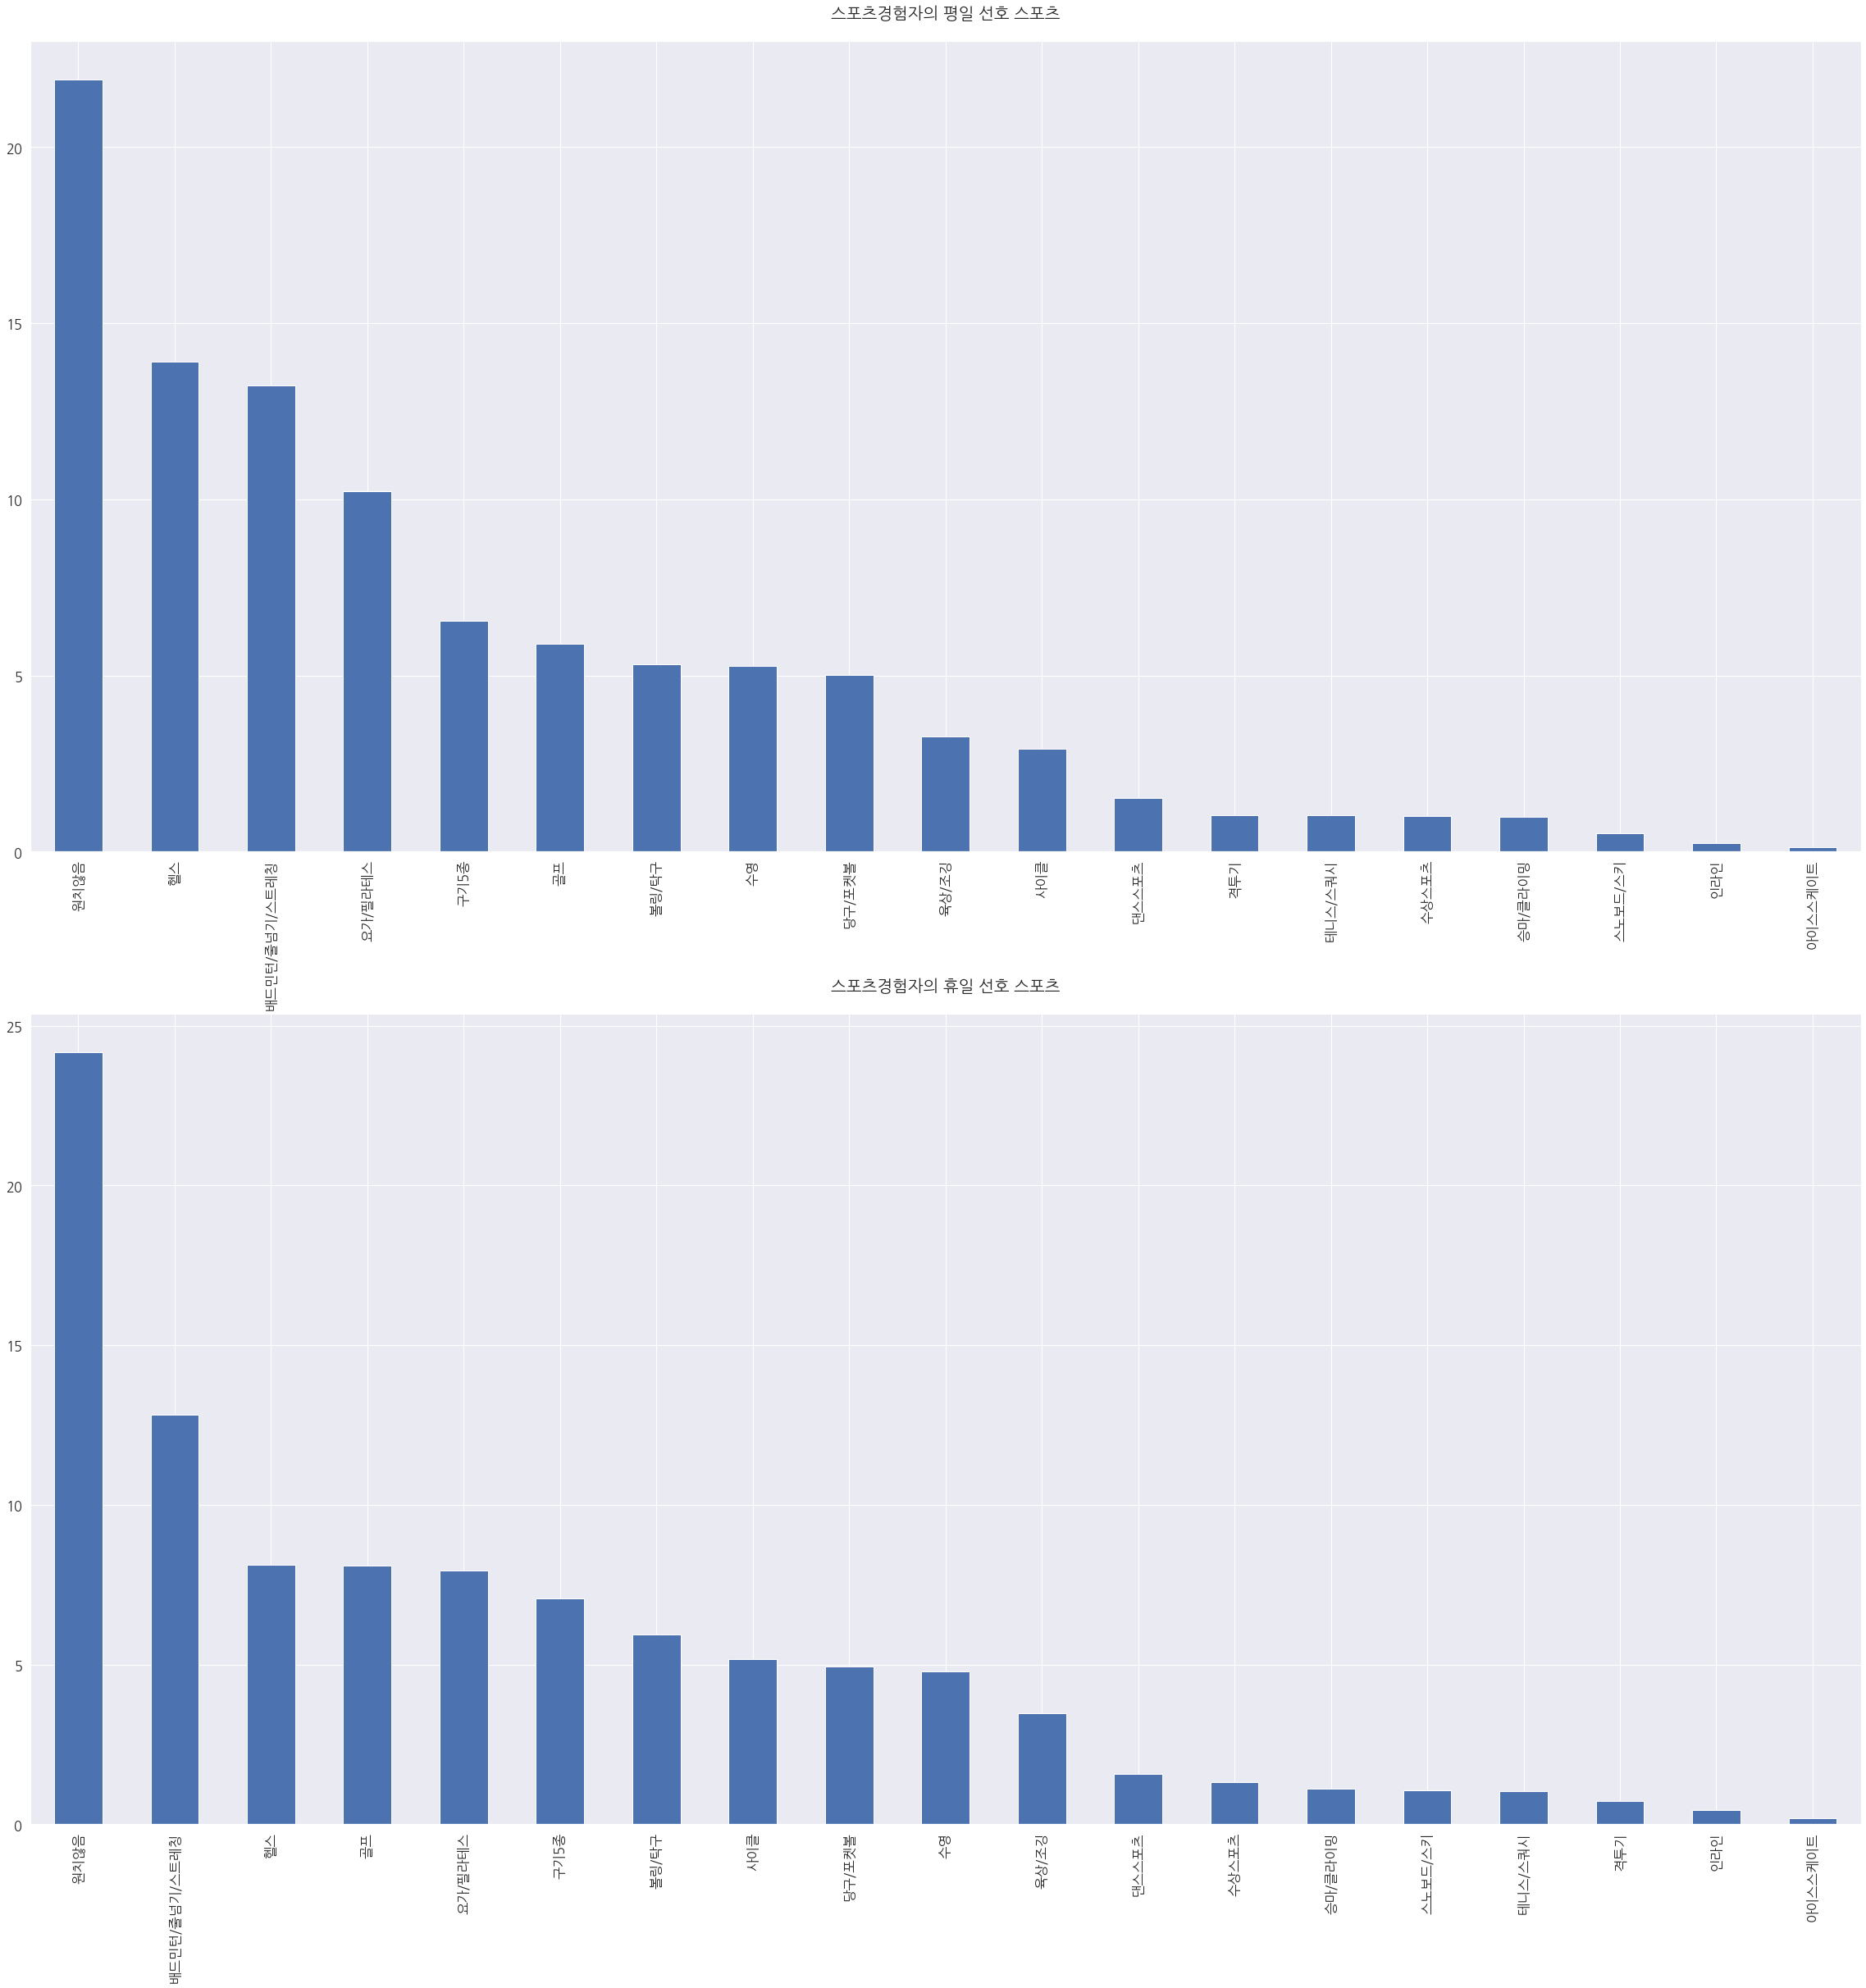

In [42]:
# 평일/휴일 간 선호 스포츠 차이 비교 시각화

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
f, ax = plt.subplots(2, 1, figsize = (40, 40))
weekday_hope_sport.plot(kind = 'bar', ax = ax[0])
weekend_hope_sport.plot(kind = 'bar', ax = ax[1])
ax[0].set_title('스포츠경험자의 평일 선호 스포츠\n', fontsize = 20)
ax[1].set_title('스포츠경험자의 휴일 선호 스포츠\n', fontsize = 20)
ax[0].set_xlabel('');  # semicolon suppresses text output
ax[1].set_xlabel('');  # semicolon suppresses text output

## 결론 2. 스포츠경험자와 스포츠비경험자 간의 스포츠 활동 참여의사도 크게 차이남
### 스포츠경험자는 건강 관련 스포츠 혹은 꾸준히 활동하는 사람이 많은 스포츠를 선호
### 스포츠비경험자는 건강 관련 스포츠 선호
### 스포츠경험자 중 평일에 헬스를 희망하는 비율이 휴일에 헬스를 희망하는 비율보다 6% 더 높음 (차이가 제법 남)
### 스포츠경험자 중 휴일에 사이클/골프를 희망하는 비율이 휴일에 사이클/골프를 희망하는 비율보다 5% 가량 더 높음

##

### 생각해볼점:
### 1. 스포츠경험자와 스포츠인의 인구통계적 특성 혹은 경험을 비교하고, 스포츠경험자가 소비능력이 높은 스포츠인이 되도록 유도?
### 2. 스포츠경험자의 인구통계적 특성을 확인하고, 해당 인구통계적 특성을 갖는 사람에게 스포츠활동 추천?
### 3. 스포츠비경험자에게 한번이라도 스포츠관련 경험을 유도한다면, 스포츠관람/활동에 대한 선호가 높아질 수도 있을 것

In [12]:
# 스포츠경험자 여부 칼럼 생성
h21['sports_exp'] = np.NaN

h21.loc[(h21['q1_C'] != '99') | (h21['q1_D'] != '99'), 'sports_exp'] = '1'
h21.loc[(h21['q1_C'] == '99') & (h21['q1_D'] == '99'), 'sports_exp'] = '0'

sports_col.extend(['sports_exp'])

# 변수선택으로 추린 변수
df = h21[['q45', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DM8', 'DM11', 'sports_exp']]
df.columns = ['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage', 'householder', 'income', 'city', 'target']
predictor = ['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage', 'householder', 'income', 'city']
df.columns

Index(['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage',
       'householder', 'income', 'city', 'target'],
      dtype='object')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

train, test = train_test_split(df, test_size = 0.3, random_state = 0, stratify = df['target'])
train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

train_X_dummy = pd.get_dummies(train_X, columns = predictor)
test_X_dummy = pd.get_dummies(test_X, columns = predictor)

C:\Users\sujin\AppData\Local\Temp\ipykernel_3472\3915165696.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)
c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


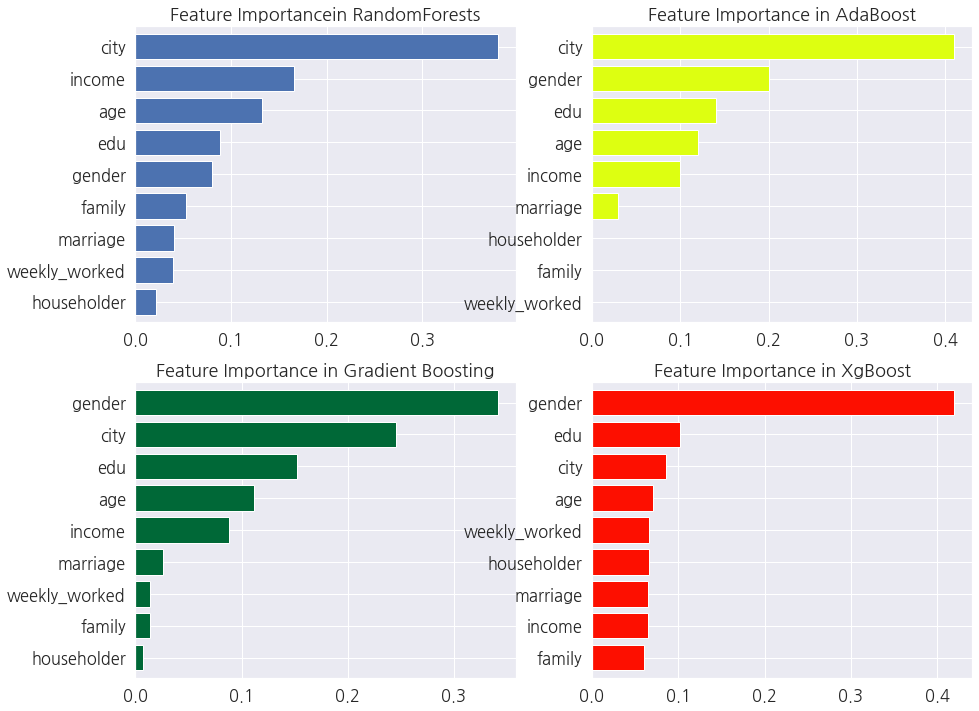

In [345]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))

model = RandomForestClassifier(n_estimators = 200, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 0])
ax[0, 0].set_title('Feature Importancein RandomForests')

model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 1], color = '#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 0], cmap = 'RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X, y.astype(int))
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 1], color = '#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()

C:\Users\sujin\AppData\Local\Temp\ipykernel_3472\3478730103.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X_dummy, train_y)


Accuracy for Random Forests is 0.6812603648424544


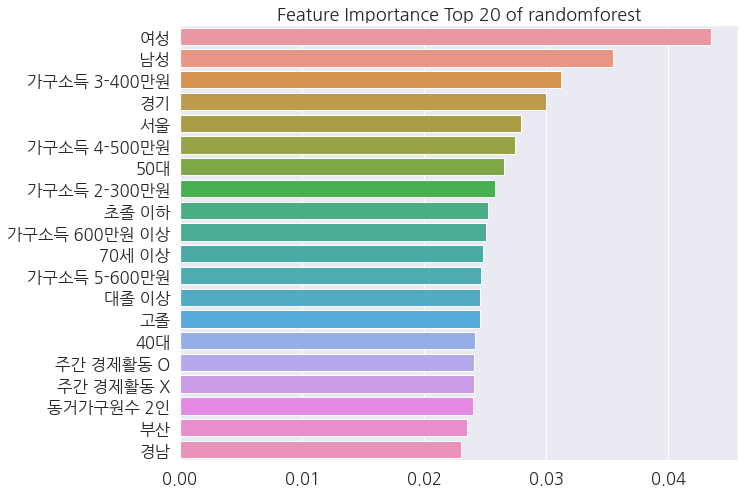

In [347]:
# RandomForest의 Top 20 feature

model = RandomForestClassifier()
model.fit(train_X_dummy, train_y)
prediction_rf = model.predict(test_X_dummy)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction_rf, test_y))
ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
ft_top20.index = ['여성', '남성', '가구소득 3-400만원', '경기', '서울', '가구소득 4-500만원', '50대', '가구소득 2-300만원', '초졸 이하', '가구소득 600만원 이상', '70세 이상', '가구소득 5-600만원', '대졸 이상', '고졸', '40대', '주간 경제활동 O', '주간 경제활동 X', '동거가구원수 2인', '부산', '경남']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of randomforest')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()

Accuracy for xgboost is 0.6975124378109453


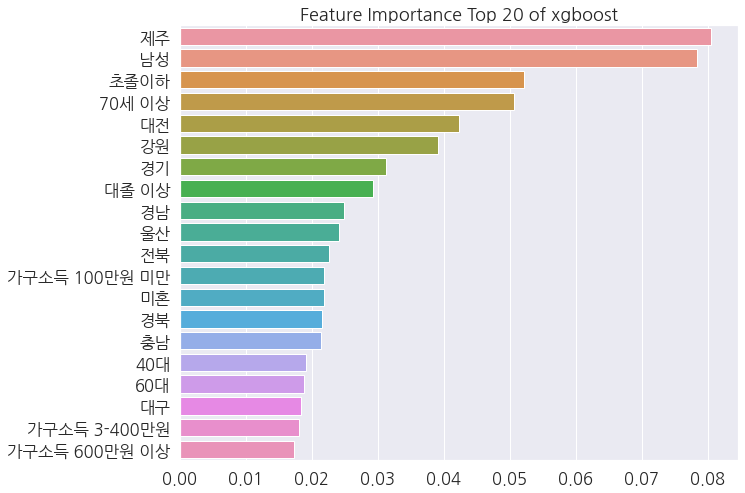

In [349]:
from xgboost import XGBClassifier
from xgboost import plot_importance

train_y_for = train_y.astype(int)
model = XGBClassifier(random_state = 11)
model.fit(train_X_dummy, train_y_for)
prediction_xg = model.predict(test_X_dummy)
print('Accuracy for xgboost is', metrics.accuracy_score(prediction_xg, test_y.astype(int)))

ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
ft_top20.index = ['제주', '남성', '초졸이하', '70세 이상', '대전', '강원', '경기', '대졸 이상', '경남', '울산', '전북', '가구소득 100만원 미만', '미혼', '경북', '충남', '40대', '60대', '대구', '가구소득 3-400만원', '가구소득 600만원 이상']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of xgboost')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()

c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for gradient boost is 0.7164179104477612


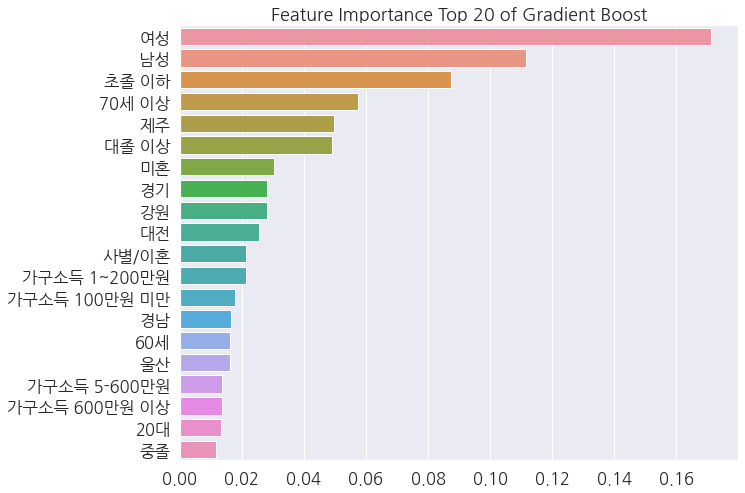

In [351]:
# GradientBoost
model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(train_X_dummy, train_y)
prediction_gb = model.predict(test_X_dummy)
print('Accuracy for gradient boost is', metrics.accuracy_score(prediction_gb, test_y))

ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
ft_top20.index = ['여성', '남성', '초졸 이하', '70세 이상', '제주', '대졸 이상', '미혼', '경기', '강원', '대전', '사별/이혼', '가구소득 1~200만원', '가구소득 100만원 미만', '경남', '60세', '울산', '가구소득 5-600만원', '가구소득 600만원 이상', '20대', '중졸']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of Gradient Boost')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()

### 스포츠인 변수 생성

In [14]:
# 스포츠경험자 여부 칼럼 생성
df_sports = h21
df_sports['sportsman'] = 0
df_sports = df_sports.convert_dtypes()
df_sports = df_sports.replace(" ", '99') # 공백을 NA로 대체
df_sports = df_sports[sports_col]
q6_sports = df_sports['q6'].isin(['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']) # 1581명의 스포츠인
df_sports['sportsman'] = q6_sports.astype(int)

In [15]:
df2 = df_sports[['q45', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DM8', 'DM11', 'sportsman']]
df2.columns = ['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage', 'householder', 'income', 'city', 'target']
predictor2 = ['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage', 'householder', 'income', 'city']
df2.columns

Index(['weekly_worked', 'gender', 'age', 'edu', 'family', 'marriage',
       'householder', 'income', 'city', 'target'],
      dtype='object')

In [63]:
c['weekly_worked'].sort_values()

city  target
12    1          8.9
14    1          9.9
4     1         10.1
6     1         10.9
8     1         11.4
11    1         11.9
7     1         14.1
1     1         14.6
10    1         14.7
9     1         15.0
16    1         17.0
15    1         18.9
13    1         19.6
3     1         20.3
5     1         20.4
2     1         22.7
17    1         29.8
      0         70.2
2     0         77.3
5     0         79.6
3     0         79.7
13    0         80.4
15    0         81.1
16    0         83.0
9     0         85.0
10    0         85.3
1     0         85.4
7     0         85.9
11    0         88.1
8     0         88.6
6     0         89.1
4     0         89.9
14    0         90.1
12    0         91.1
Name: weekly_worked, dtype: float64

In [61]:
a = df2.groupby(['city', 'target']).count()
b = df2.groupby(['city']).count()
c = round(a[a.columns[:1]] / b[b.columns[:1]] * 100, 1)
c
# 91.1%인 도시 12 = 충남
# 비스포츠인:스포츠인 비율
# 충남 91.1: 8.9
# 서울 85.4:14.6
# 제주 70.8:29.8

weekly_worked
city target               
1    0                85.4
     1                14.6
2    0                77.3
     1                22.7
3    0                79.7
     1                20.3
4    0                89.9
     1                10.1
5    0                79.6
     1                20.4
6    0                89.1
     1                10.9
7    0                85.9
     1                14.1
8    0                88.6
     1                11.4
9    0                85.0
     1                15.0
10   0                85.3
     1                14.7
11   0                88.1
     1                11.9
12   0                91.1
     1                 8.9
13   0                80.4
     1                19.6
14   0                90.1
     1                 9.9
15   0                81.1
     1                18.9
16   0                83.0
     1                17.0
17   0                70.2
     1                29.8

In [23]:
df2[['city', 'target']].value_counts().sort_index()

city  target
1     0         1020
      1          175
2     0          534
      1          157
3     0          462
      1          118
4     0          561
      1           63
5     0          360
      1           92
6     0          410
      1           50
7     0          335
      1           55
8     0          178
      1           23
9     0         1119
      1          197
10    0          405
      1           70
11    0          423
      1           57
12    0          512
      1           50
13    0          411
      1          100
14    0          456
      1           50
15    0          505
      1          118
16    0          565
      1          116
17    0          212
      1           90
dtype: int64

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

train, test = train_test_split(df2, test_size = 0.3, random_state = 0, stratify = df2['target'])
train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df2[df2.columns[:-1]]
y = df2[df2.columns[-1:]]

train_X_dummy = pd.get_dummies(train_X, columns = predictor)
test_X_dummy = pd.get_dummies(test_X, columns = predictor)

C:\Users\sujin\AppData\Local\Temp\ipykernel_3472\3915165696.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)
c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


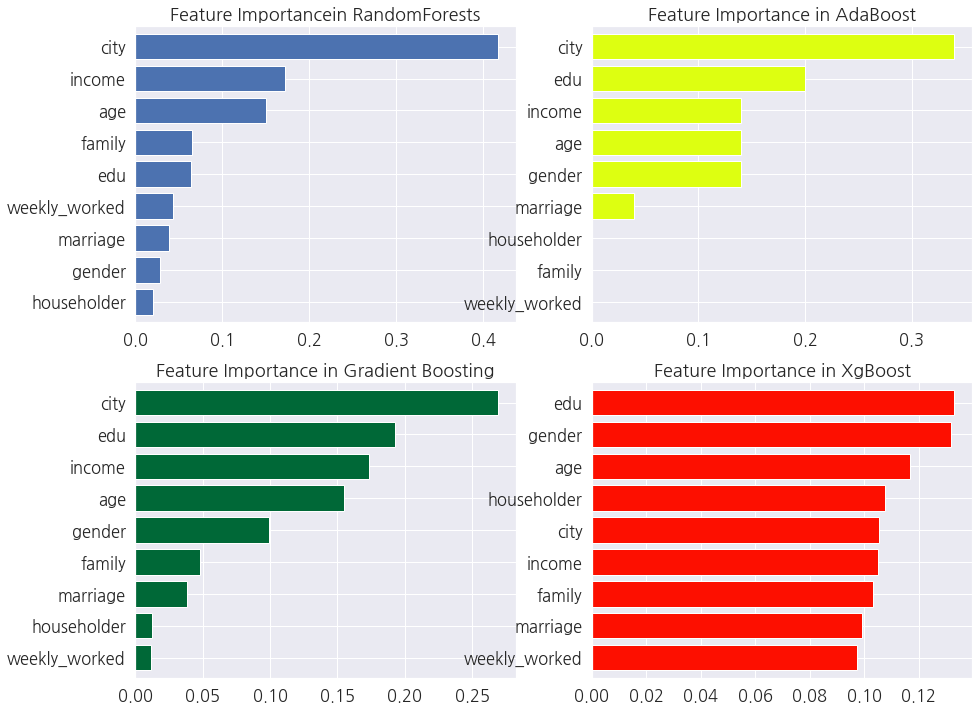

In [387]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))

model = RandomForestClassifier(n_estimators = 200, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 0])
ax[0, 0].set_title('Feature Importancein RandomForests')

model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 1], color = '#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X, y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 0], cmap = 'RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X, y.astype(int))
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 1], color = '#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()

C:\Users\sujin\AppData\Local\Temp\ipykernel_3472\4165253079.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X_dummy, train_y)


Accuracy for Random Forests is 0.8135986733001659


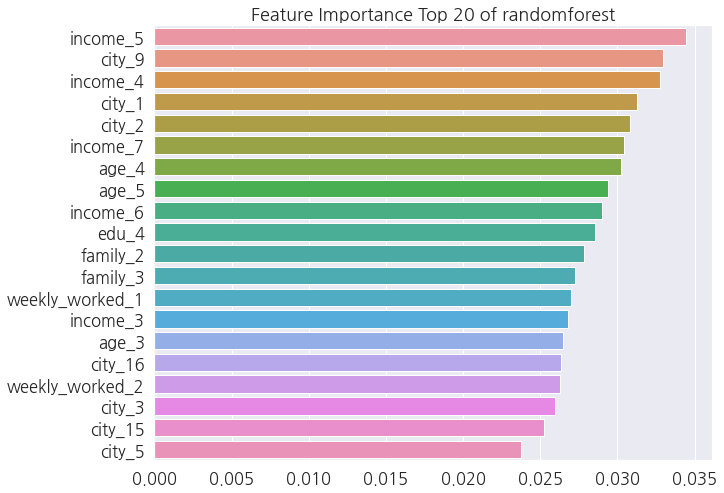

In [388]:
# RandomForest의 Top 20 feature

model = RandomForestClassifier()
model.fit(train_X_dummy, train_y)
prediction_rf = model.predict(test_X_dummy)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction_rf, test_y))
ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
#ft_top20.index = ['여성', '남성', '가구소득 3-400만원', '경기', '서울', '가구소득 4-500만원', '50대', '가구소득 2-300만원', '초졸 이하', '가구소득 600만원 이상', '70세 이상', '가구소득 5-600만원', '대졸 이상', '고졸', '40대', '주간 경제활동 O', '주간 경제활동 X', '동거가구원수 2인', '부산', '경남']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of randomforest')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()

c:\Users\sujin\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for gradient boost is 0.839469320066335


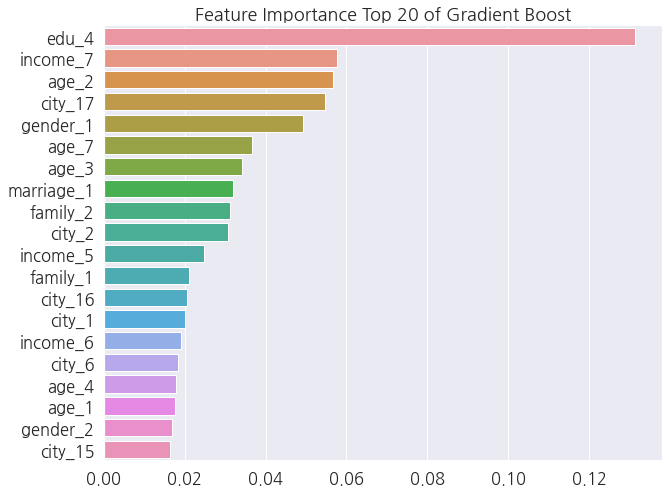

In [389]:
# GradientBoost
model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(train_X_dummy, train_y)
prediction_gb = model.predict(test_X_dummy)
print('Accuracy for gradient boost is', metrics.accuracy_score(prediction_gb, test_y))

ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
#ft_top20.index = ['여성', '남성', '초졸 이하', '70세 이상', '제주', '대졸 이상', '미혼', '경기', '강원', '대전', '사별/이혼', '가구소득 1~200만원', '가구소득 100만원 미만', '경남', '60세', '울산', '가구소득 5-600만원', '가구소득 600만원 이상', '20대', '중졸']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of Gradient Boost')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()

Accuracy for xgboost is 0.8218905472636816


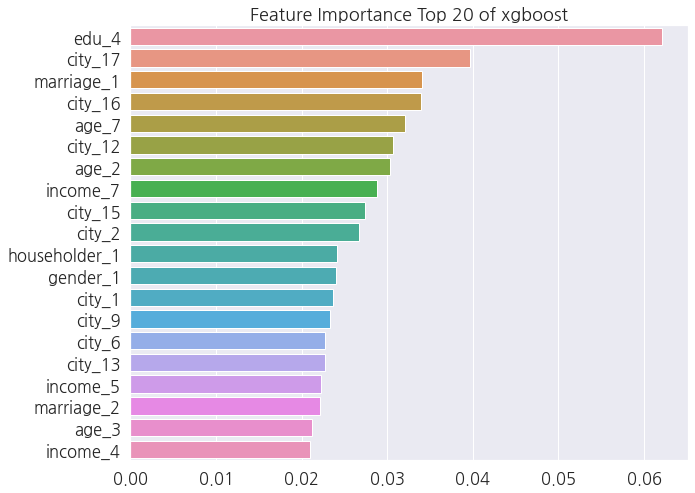

In [391]:
from xgboost import XGBClassifier
from xgboost import plot_importance

train_y_for = train_y.astype(int)
model = XGBClassifier(random_state = 11)
model.fit(train_X_dummy, train_y_for)
prediction_xg = model.predict(test_X_dummy)
print('Accuracy for xgboost is', metrics.accuracy_score(prediction_xg, test_y.astype(int)))

ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top20 = ft_series.sort_values(ascending = False)[:20]
#ft_top20.index = ['제주', '남성', '초졸이하', '70세 이상', '대전', '강원', '경기', '대졸 이상', '경남', '울산', '전북', '가구소득 100만원 미만', '미혼', '경북', '충남', '40대', '60대', '대구', '가구소득 3-400만원', '가구소득 600만원 이상']

plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 20 of xgboost')
sns.barplot(x = ft_top20, y = ft_top20.index)
plt.show()